In [1]:
import numpy as np 
from PIL import Image
from tensorflow.keras.preprocessing import image

In [2]:
from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
'''
    include_top = False 
    discards all the dense layers from the model. 
    VGG16 dense layers are made to classify 1000 different lables, but we only have two images.
'''
vgg16 = VGG16(weights='imagenet', include_top=False, pooling='max', input_shape=(224, 224, 3))
vgg16.summary()

'''
    input_shape=(224, 224, 3),
    The size of the images in the dataset must be the same as the size that the 1st convolution layer accepts.
'''

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

'\n    input_shape=(224, 224, 3),\n    The size of the images in the dataset must be the same as the size that the 1st convolution layer accepts.\n'

In [4]:
'''
    We should go to each layers of the above model and specify that we don't need any new training. 
    We will use all the pre-set parameters of the VGG16 which was trained in default with ImageNet dataset.
'''
for model_layer in vgg16.layers:
  model_layer.trainable = False

In [5]:
def load_image(image_path):
    """
        -----------------------------------------------------
        Process the image provided. 
        - Resize the image 
        -----------------------------------------------------
        return resized image
    """

    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))

    return resized_image

In [6]:
def get_image_embeddings(object_image : image):
    
    """
        -----------------------------------------------------
        convert image into 3d array and added additional
        dimension for model input
        -----------------------------------------------------
        return embeddings of the given image
    """

    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)

    return image_embedding

In [7]:
def get_similarity_score(first_image : str, second_image : str):
    """
        -----------------------------------------------------
        Takes image array and computes its embedding using VGG16 model.
        -----------------------------------------------------
        return embedding of the image
        
    """

    first_image = load_image(first_image)
    second_image = load_image(second_image)

    first_image_vector = get_image_embeddings(first_image)
    second_image_vector = get_image_embeddings(second_image)
    
    similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)

    return similarity_score

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
def show_image(image_path):
  image = mpimg.imread(image_path)
  imgplot = plt.imshow(image)
  plt.show()

In [10]:
sunflower = '/content/sunflower.jpeg'
helianthus = '/content/helianthus.jpeg'

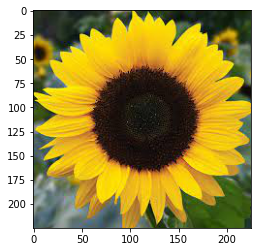

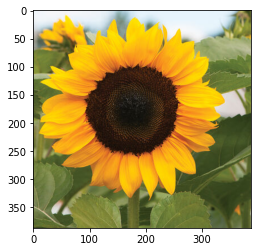

(None, None)

In [11]:
show_image(sunflower), show_image(helianthus)

In [12]:
similarity_score = get_similarity_score(sunflower, helianthus)
similarity_score

array([0.8446182], dtype=float32)

In [13]:
tulip = '/content/Tulip.jpeg'

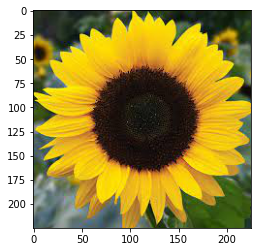

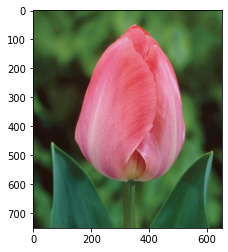

(None, None)

In [14]:
show_image(sunflower), show_image(tulip)

In [15]:
similarity_score = get_similarity_score(sunflower, tulip)
similarity_score

array([0.49226725], dtype=float32)